##### 調整影像的對比和亮度
這篇教學會介紹使用 OpenCV 搭配 NumPy，調整影像的對比度和亮度，除此之外，也會使用 convertScaleAbs() 進行加強影像的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 搭配 NumPy 調整對比度和亮度 
在 OpenCV 裡讀取的影像，實質上是 NumPy 的陣列，因此在讀取影像後，透過 NumPy「陣列廣播」的功能，\
就能迅速更改圖片中每個像素的顏色，下方的例子，使用了簡單的轉換公式，只要調整 contrast ( 對比 ) 和 brightness ( 亮度 ) 的數值，\
就能改變影像的對比度和亮度。

* 參考：[陣列廣播](https://steam.oxxostudio.tw/category/python/numpy/numpy-broadcast.html)、[np.clip()](https://steam.oxxostudio.tw/category/python/numpy/numpy-math.html#a5)、[np.uint8()](https://steam.oxxostudio.tw/category/python/numpy/numpy-dtype.html#a0)

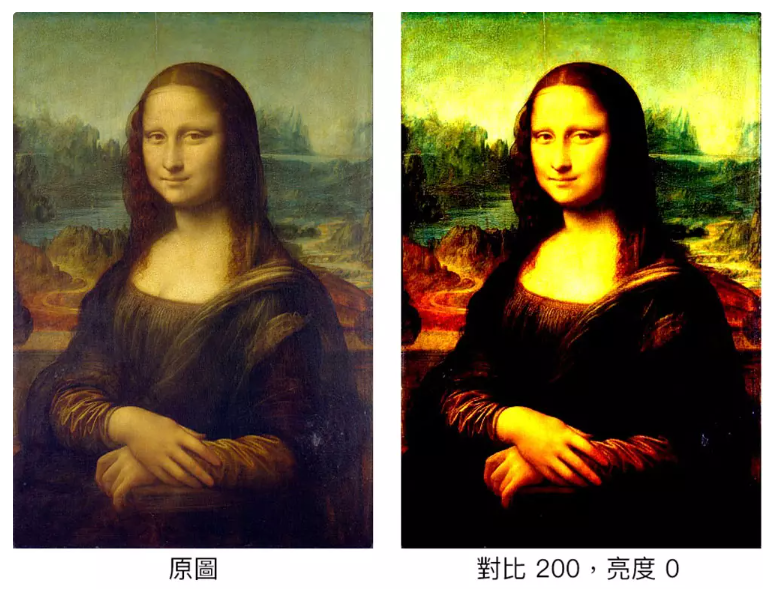

下圖為五張不同亮度和對比所產生的圖片效果。

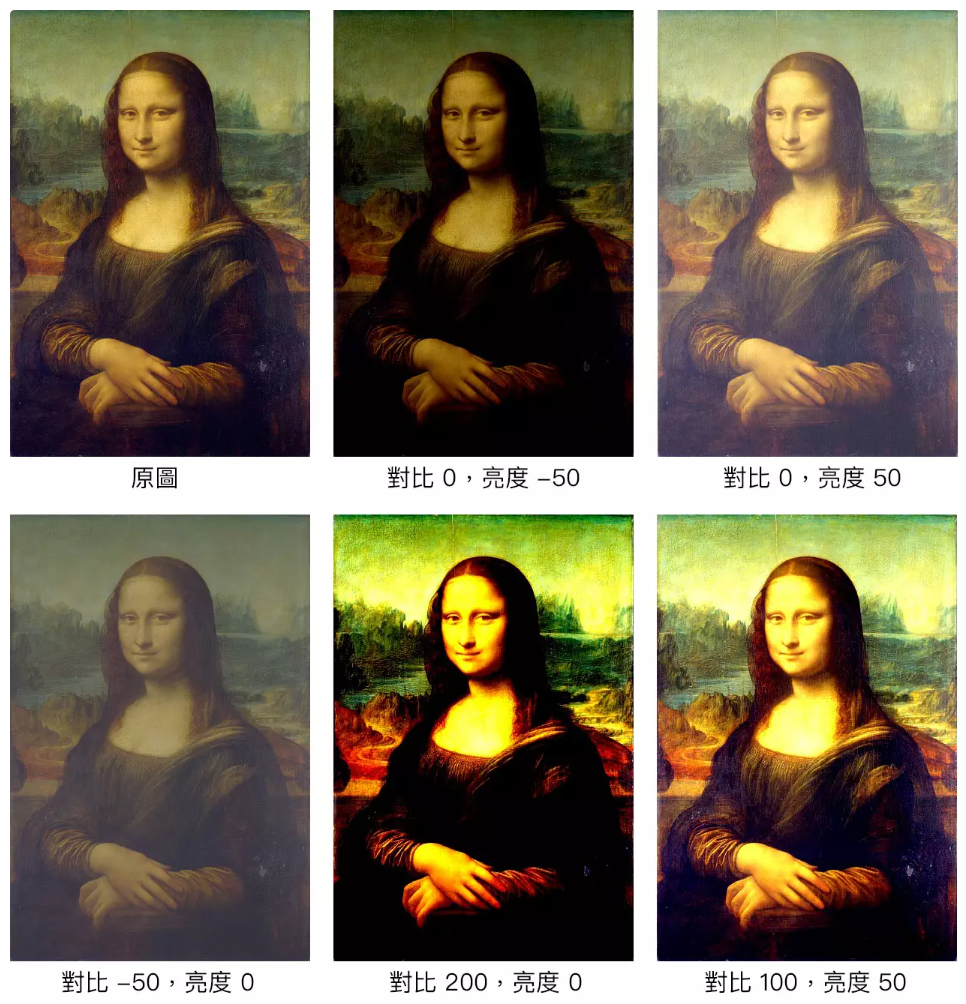

In [2]:
import cv2
import numpy as np
img = cv2.imread('meme_1.jpg')

contrast = -50
brightness = 0
output = img * (contrast/127 + 1) - contrast + brightness # 轉換公式
# 轉換公式參考 https://stackoverflow.com/questions/50474302/how-do-i-adjust-brightness-contrast-and-vibrance-with-opencv-python

# 調整後的數值大多為浮點數，且可能會小於 0 或大於 255
# 為了保持像素色彩區間為 0～255 的整數，所以再使用 np.clip() 和 np.uint8() 進行轉換
output = np.clip(output, 0, 255) # 限制範圍在 0～255
output = np.uint8(output)       # 轉換為 0～255 的整數

cv2.imshow('oxxostudio1', img)    # 原始圖片
cv2.imshow('oxxostudio2', output) # 調整亮度對比的圖片
cv2.waitKey(0)                    # 按下任意鍵停止
cv2.destroyAllWindows()

##### 使用 convertScaleAbs() 加強影像 
使用 OpenCV 的 convertScaleAbs 方法，可以根據特定的公式，轉換影像中每個像素，使用方法如下：

In [ ]:
cv2.convertScaleAbs(img, output, alpha, beta)
# img 來源影像
# output 輸出影像，公式：output = img*alpha + beta
# alpha, beta 公式中的參數

下方的程式碼執行後，就會套用特定的參數進行加強影像的效果。

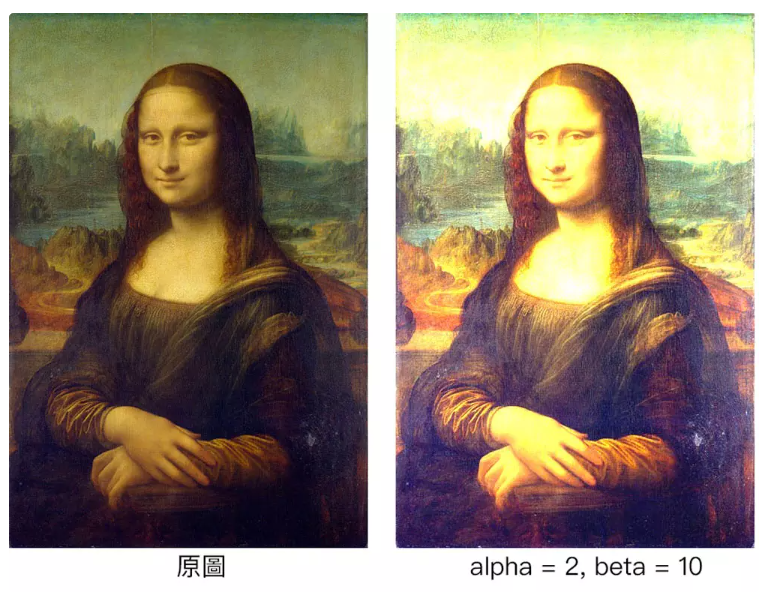

In [4]:
import cv2
import numpy as np
img = cv2.imread('meme_1.jpg')
output = img    # 建立 output 變數

alpha = 2
beta = 10

cv2.convertScaleAbs(img, output, alpha, beta)  # 套用 convertScaleAbs
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)      # 按下任意鍵停止
cv2.destroyAllWindows()